# Slots
* Define and work with slots
* Demonstrate the memory advantages of working with slots
* understand when to use slots and what side effects to watch out for 


# Why slots exists?
* Advantages of memory profile
* Good principles
* They do have surprise side effects
* Practice slots with inheritance

# Instance Data Storage Review


In [6]:
class Employee(object):
    def __init__(self, name, surname, age, status, salary):
        self.name = name
        self.surname = surname
        self.age = age
        self.status = status
        self.salary = salary
        

In [7]:
m1 = Employee("Krsna Dev", "Chaitanya", 99, "CON", 10000000000)

In [8]:
m1

In [9]:
m1.name

'Krsna Dev'

In [10]:
m1.__dict__

{'name': 'Krsna Dev',
 'surname': 'Chaitanya',
 'age': 99,
 'status': 'CON',
 'salary': 10000000000}

In [11]:
type(m1.__dict__)

dict

In [12]:
type(m1.__class__.__dict__) # class namespace

mappingproxy

# Flexibility -> cost
* Python is to provision a dictionary for all instances created.
* There is a memory overhead cost as well as slight execution of speed, too.
*  Because, each instance attracts a dictionary that could have an unlimited number of key value bindings.
* Because, each instance attracts a dictionary that could have an unlimited number of key value bindings.

* The memory allocated for that object is often much bigger than it needs to be in practice and over a large number of instances, the overall program execution also suffers.

# Flexibility -> cost

# Cost?
* Memory problem
* Execution problem

# Memory problem and execution problem

# Precisely these optimization issues that slots help us address when we know the range of attributes.

# As we allude in the previous lecture, if we know exactly what attributes a class should support?










In [18]:
# Using slots
class Employee(object):
    __slots__ = ('name', 'age', 'status', 'salary')
    
    def __init__(self, name, surname, age, status, salary):
        self.name = name
        self.surname = surname
        self.age = age
        self.status = status
        self.salary = salary


In [19]:
s1_emp = Employee("Hare Krsna", "Rama", 99, "GEETA", 10000000)

AttributeError: 'Employee' object has no attribute 'surname'

In [14]:
s1_emp

In [15]:
s1_emp.name

'Hare Krsna'

In [16]:
s1_emp.age

99

In [20]:
s1_emp.__dict__

{'name': 'Hare Krsna',
 'surname': 'Rama',
 'age': 99,
 'status': 'GEETA',
 'salary': 10000000}

# Slots Explanation
* Note: The above statement s1_emp.__dict__ shall triggern an error but in my case it worked not sure what is happening with slots

* Python behind the scenes creates a fixed length sequence data type.

* So we can think of this as a list or a tuple, but technically it's just a fixed size array.

*  So we can think of this as a list or a tuple, but technically it's just a fixed size array.
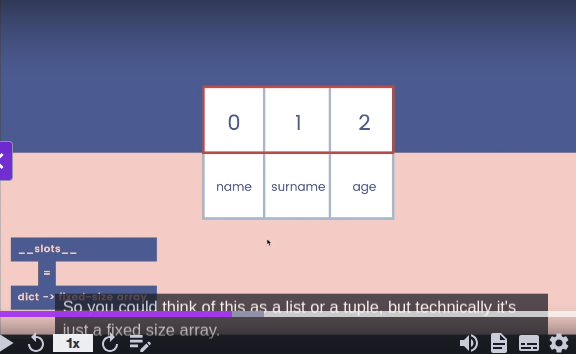

* Each index on this data structure is mapped to the attribute names that we specify in the slots.

* Two advantages of doing this:
- Becuase we're dealing with a fixed size array, the data structure that stores the information, is as small as it needs to be so we save memory.
- Second, each attribute is mapped in advance to very specific index.
- Because, each attribute we map in advance to a very specific index attribute, attribute access is therefore significantly faster.

- More technically, for computer science folks, dictionary dictionary, sets up a lot of memory.

- by memory we mean RAM. 
- Why dictionary consumes lot of memory? because dictionary is a hash map which has a worst case time complexity of order of n.

- We moved from hash map data structure to fixed length array.
- Fixed length array is entirely written in c and also contributes to it's high efficiency.

- high efficiency: Performance gain comes from - its nothing magica, behind the scenes python does the transformation to change it from hash based dictionary to fixed length array.
- Because of this we no longer have the option of adding attributes to instances like we did in the previous lecture and we are restricted to only those that we specified in the slots class variable when we define class.

# Recap

- if we know inadvance what data attributes a class should support, using slots may offer memory and speed improvements.
- slots are defined as  a class attributes.
- behind the scenes, python switches from a dict to a fixed size array, mapping each attribute to a specific index.

This is the transformation.









* As we saw, when we define slots ina class, all instances of that class lose their dunder dict.

* They no longer have instance namespace and all attributes specified in these slots are mapped to specific indices in the new fixed length array that replaces the dictionary.

* They no longer have instance namespace and all attributes specified in these slots are mapped to specific indices in the new fixed length array that replaces the dictionary.

* But where does the mapping reside?
- the mapping reside in the class itself.
- so remember, not the instance namespace, but let's take a look at the class namespace.





In [21]:
Employee.__dict__

mappingproxy({'__module__': '__main__',
              '__slots__': ('name', 'age', 'status', 'salary'),
              '__init__': <function __main__.Employee.__init__(self, name, surname, age, status, salary)>,
              'age': <member 'age' of 'Employee' objects>,
              'name': <member 'name' of 'Employee' objects>,
              'salary': <member 'salary' of 'Employee' objects>,
              'status': <member 'status' of 'Employee' objects>,
              '__doc__': None})

* The above representation of attributes looks very similar to properties.
* where we had the properties stand on its own


In [1]:
# using slots and property -  to demonstrate the representation
# Using slots
class Employee(object):
    __slots__ = ('name', 'age', 'status', 'salary')
    
    def __init__(self, name, surname, age, status, salary):
        self.name = name
        self.surname = surname
        self.age = age
        self.status = status
        self.salary = salary

    @property
    def high_salary(self):
        return self.salary > 900000
    

In [2]:
Employee.__dict__

mappingproxy({'__module__': '__main__',
              '__slots__': ('name', 'age', 'status', 'salary'),
              '__init__': <function __main__.Employee.__init__(self, name, surname, age, status, salary)>,
              'high_salary': <property at 0x78e9bcb16e00>,
              'age': <member 'age' of 'Employee' objects>,
              'name': <member 'name' of 'Employee' objects>,
              'salary': <member 'salary' of 'Employee' objects>,
              'status': <member 'status' of 'Employee' objects>,
              '__doc__': None})

In [3]:
e1 = Employee("KCON", "Chaitanya", 99, "SUP", 999999)

AttributeError: 'Employee' object has no attribute 'surname'

From the above output, the property value of class dictionary looks similar to age, name, salary, class slotted attributes:
* At least representation wise.
* the resemblance is actually goes beyond superficial

# Both properties and slotted attributes are examples of descriptors.

* We'll have lot more about descriptors -  simply special python objects that have implement one of the three descriptors methods. They are get, set, and delete

* fget
* fset
* fdelete

* So when we define the slotted attribute, let's say name, okay employee name, python overrides the default get attribute behavior, which is a look n the instance dictionary, which by the way doesn't exist anymore.

# Recap of slots 2:
* __slots__ creates a descriptor for each mapped attribute, thereby overriding the default __getattribute__ behavior.

* as a result, just like properties slotted attributes resides in the class mapping proxy, rather than with the isntances.



# 20 Feb 2025


In [5]:
# using slots and property -  to demonstrate the representation
# Using slots
class Employee(object):
    __slots__ = ('name', 'surname', 'age', 'status', 'salary')
    
    def __init__(self, name, surname, age, status, salary):
        self.name = name
        self.surname = surname
        self.age = age
        self.status = status
        self.salary = salary

    @property
    def high_salary(self):
        return self.salary > 900000
    

In [6]:
e1 = Employee("krsna", "Chaitanya", 99, "SUP", 999999)

In [7]:
e1.__dict__

AttributeError: 'Employee' object has no attribute '__dict__'

In [8]:
Employee.__dict__

mappingproxy({'__module__': '__main__',
              '__slots__': ('name', 'surname', 'age', 'status', 'salary'),
              '__init__': <function __main__.Employee.__init__(self, name, surname, age, status, salary)>,
              'high_salary': <property at 0x78e9bc4e1630>,
              'age': <member 'age' of 'Employee' objects>,
              'name': <member 'name' of 'Employee' objects>,
              'salary': <member 'salary' of 'Employee' objects>,
              'status': <member 'status' of 'Employee' objects>,
              'surname': <member 'surname' of 'Employee' objects>,
              '__doc__': None})

# Class Residents
As we saw, the above example, we define slots in a class, all instances of that class lose their dunder dict.
- so they no longer have that instance namespace and all attributes specified in these slots are mapped to specific indices in the new fixed length array that replaces the dictionary.
- Where does the mapping reside?
    * The mapping resides in the class namespace instead of instance namespace  - when we use slots

* In terms of representation, at least what we visibly see here, this looks very similar to properties.
* Where we had the properties stand on its own.

What it turns out is that both properties and slotted attributes are examples of descriptors which i think we've mentioned.

# Both properties and slotted attributes are examples of descriptors.

# Descriptors are special python objects that implement one of the 3 descriptors methods
- get()
- set()
- delete()

Properties are very specific type of descriptor, so descriptor is the super set concept here of which slots are also examples of.

# So when we define a slotted attribute, let's say name, employee name, python overrides the default get attribute behavior, which is to look in the instance dictionary, which by the way doesn't exist enymore and python overrides that  and instead delegates it to the descriptor which resides in the class.

* So the member name of employee object takes control, which, as we mentioned, uses that fixed array as its store of data.

* So the get of this descriptor executes and points to the data that we store in that fixed array.

# Recap

* __slots__ creates a descriptor for each mapped attribute, thereby overriding the default __getattribute__ behavior.

* as a result, just like properties, slotted attributes reside in the class mapping proxy, rather than with the instances.




# Bonus Lecture: Demonstrating the memory advantage
* Memory advantages of using slots
- we mentioned earlier that using slots saves memory because the backing data structure that saves the attribute values is smaller.
- Let's take a look at memory profile to try to quantify that effect?

- # Pympler
Pympler is a profiling tool that helps us analyze the memory usage of python objects at runtime.
* its a separate package, so we'll need to bring into our environment.

#!pip install pympler # we can use exclamation in the beginning of the pip command to install python package from jupyter notebook instead of openning command prompt and installing it.


In [9]:
# using slots and property -  to demonstrate the representation
# Using slots
class SlottedEmployee(object):
    __slots__ = ('name', 'surname', 'age', 'status', 'salary')
    
    def __init__(self, name, surname, age, status, salary):
        self.name = name
        self.surname = surname
        self.age = age
        self.status = status
        self.salary = salary

    @property
    def high_salary(self):
        return self.salary > 900000

class RegularEmployee(object):
    #__slots__ = ('name', 'surname', 'age', 'status', 'salary')
    
    def __init__(self, name, surname, age, status, salary):
        self.name = name
        self.surname = surname
        self.age = age
        self.status = status
        self.salary = salary


In [10]:
e1 = SlottedEmployee("krsna", "Chaitanya", 99, "SUP", 999999)
e2 = RegularEmployee("krsna", "Chaitanya", 99, "SUP", 999999)

In [12]:
!pip install pympler

Defaulting to user installation because normal site-packages is not writeable


In [18]:
pympler

ModuleNotFoundError: No module named 'pympler'

In [15]:
from pympler.asizeof import asizeof

asizeof(e1) # slotted

asizeof(e2) # regular

ModuleNotFoundError: No module named 'pympler'

the above output will be as follows:
Regular - 664 bytes
Slotted - 304 bytes

imagine if you are dealing with millions of instances as part of a much bigger application. you could be running your app at half the RAM usage by simply using slotted classes.

# Why we didn't use the python standard library to do this

under sys module funciton called getsizeof


In [19]:
from sys import getsizeof
getsizeof(e1)

72

In [20]:
getsizeof(e2)

48

Why the values are completely off from pympler library versus function from sys module?
* The reason is that get size off from the standard library does not take into account reference objects.

* sys.getsizeof does not account for reference objects.
# Very important distinction
* If it doesn't take account of reference objects, what exactly does it measure?
- well, it only measures the size of the structure that implements the type the class.

- Because, slots are stored in the class, there's additional information embedded in the slotted type.

- Another reason why the size is bigger when we use sys module is that it compares the class, also because the instance dictionary of the regular employee class, which is not slotted because that is also a reference object that alongside all the other refernces are not even taken into account, creating the appearance that regular emplyee, the instance of regular employee is smaller, which is absolutely not true.

getsizeof from the standard library simply measures the size of the structure implementing the type.


